question 1:

Simple Linear Regression (SLR) model, it is important to understand these concepts: Predictor Variable (X) which is independent variables, Outcome Variable (Y) which is dependent variables, Slope Coefficient (𝛽1), Intercept (𝛽0),Error Term (𝜖), and their relation. 

The concepts:
Predictor Variable (X): It is an independent variables and it can predict the outcomes (outcomes variables Y). It is measured variables and has a linear relationship with Y.

Outcome Variable (Y): It is an dependent variables and it being predicted based on predictor variable (X).

Slope Coefficient (𝛽1): It is the slope of the linear line, in another word, it is the rate of change in Y for each units of change in X. It shows the absolute rate of change (by numbers) and the direction (by sign + and -).

Intercept (B0): The predict value of Y when X equal to 0.

Error Term (𝜖): A predict value of Y when X equal to 0. This is the starting value of Y without any affect from X.

The relation:
This model assumes: for any given value of X, the value of Y can be estimated as a linear function of X, plus some random error.

The formula to calculate:
Y=β0+β1X+ϵ

how they combine to form a sample from normal distribution:
In Simple Linear Regression (SLR), for each given value of X, the value Y is normally distribution around the linear line (B0 + B1X). The error term 𝜖 adds variability around this line. Each observed value of Y for a fixed X value can be thought of as a random sample from a normal distribution centered at 𝛽0+𝛽1𝑋 with some variance (𝜎 square of 2)

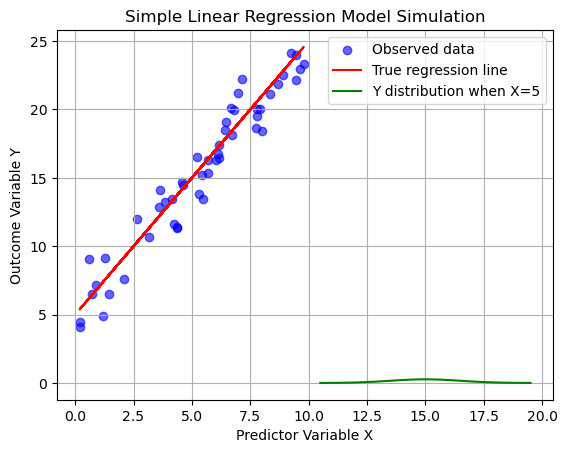

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the theoretical SLR model
beta_0 = 5    # Intercept
beta_1 = 2    # Slope
sigma = 1.5   # Standard deviation of the error term

# Generate predictor variable X
np.random.seed(0)  # For reproducibility
X = np.random.uniform(0, 10, 50)  # 50 random values between 0 and 10

# Generate error term ε, which follows a normal distribution with mean 0 and standard deviation sigma
epsilon = np.random.normal(0, sigma, X.shape)

# Calculate the outcome variable Y based on the SLR equation
Y = beta_0 + beta_1 * X + epsilon

# Visualize the relationship between X and Y
plt.scatter(X, Y, label='Observed data', color='blue', alpha=0.6)
plt.plot(X, beta_0 + beta_1 * X, label='True regression line', color='red')

# Show the theoretical normal distribution of Y for a fixed X value
X_fixed = 5  # Let's say we're interested in the distribution of Y when X is 5
Y_fixed_mean = beta_0 + beta_1 * X_fixed  # Mean of Y when X = 5
Y_fixed = np.linspace(Y_fixed_mean - 3 * sigma, Y_fixed_mean + 3 * sigma, 100)
plt.plot(Y_fixed, norm.pdf(Y_fixed, Y_fixed_mean, sigma), label='Y distribution when X=5', color='green')

# Labels and legend
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Simple Linear Regression Model Simulation")
plt.legend()
plt.grid(True)
plt.show()

Question 2:

Step-by-step process:

1. Simulate data from the SLR model by using specified error and coefficients.
2. Fit an SLR model to the simulated data using statsmodels.
3. Make the fitted regresssion line and the observed data points visualiable.

The explaination of the code:
Simulate the Data: use the parameter, the value of B1, B0, σ to generate data points based on our theoretical SLR model. In the following example: we use B0 = 5 (beta_0), B1 = 2(beta_1), σ = 1.5(signma)
Create a DataFrame: Store the simulated predictor X and outcome Y values in a pandas DataFrame for easier manipulation and compatibility with statsmodels
Fit the Regression Model: Using [statsmodels.formula.api.ols], fit a SLR model to the data. The formula 'Y ~ X' demonstrate 𝑋 is the independent variable and 𝑌 is the dependent variable. The .fit() method runs the code and stores results.
Display the Model Summary: model.summary outputs all the summary, including estimates value for 𝛽0 (Intercept) and 
𝛽1(Slope), standard errors, and various statistical measures.
Visualization: Plot the observed data points as a scatter plot and add the fitted regression line using model.predict(data['X']) to display the relationship captured by the model.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     705.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.34e-30
Time:                        15:11:55   Log-Likelihood:                -87.319
No. Observations:                  50   AIC:                             178.6
Df Residuals:                      48   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9892      0.443     11.250      0.0

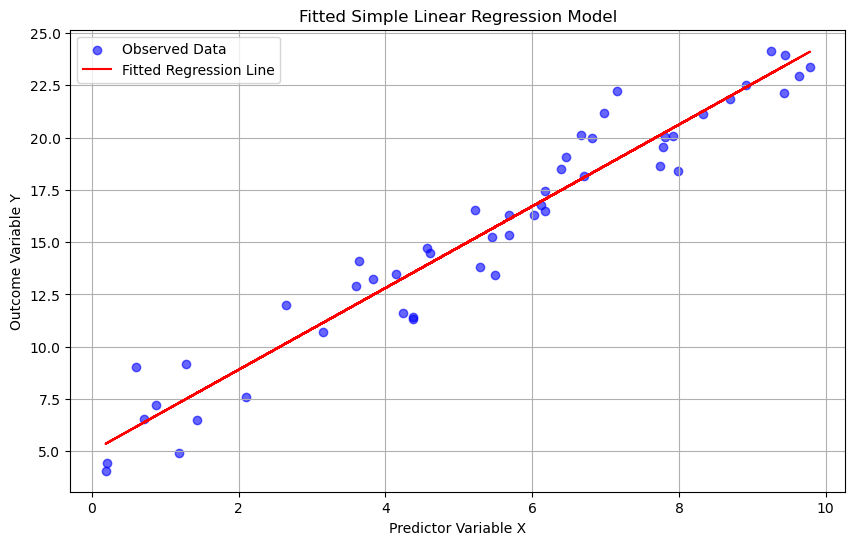

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters for the theoretical SLR model
beta_0 = 5    # Intercept
beta_1 = 2    # Slope
sigma = 1.5   # Standard deviation of the error term

# Generate predictor variable X and error term ε
np.random.seed(0)  # For reproducibility
X = np.random.uniform(0, 10, 50)  # 50 random values between 0 and 10
epsilon = np.random.normal(0, sigma, X.shape)

# Calculate the outcome variable Y based on the SLR equation
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame to hold our simulated data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Display the model summary
print(model.summary())

# Visualize the observed data points and fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label='Observed Data', color='blue', alpha=0.6)
plt.plot(data['X'], model.predict(data['X']), label='Fitted Regression Line', color='red')

# Labels and legend
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Fitted Simple Linear Regression Model")
plt.legend()
plt.grid(True)
plt.show()

Question 3:

Difference Between the Two Lines: 
Theoretical Line (Green line): the "true" relationship between 𝑋 and 𝑌 defined by the parameter B0 and B1. This is the expect average 𝑌 value for any given 𝑋 value (the potient Y values based on X), without any randomness. It is the assumed or ideal relationship between X and Y.

Fitted Regression Line (Red line): The Fitted Regression line includes the estimated value from the simulated data, and it includes random error. The Fitted Regression Line may contains some difference with Theoretical line, because it affected by the random values of 𝜖 in the data, due to the random variation of the sample.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     705.7
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.34e-30
Time:                        15:29:17   Log-Likelihood:                -87.319
No. Observations:                  50   AIC:                             178.6
Df Residuals:                      48   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9892      0.443     11.250      0.0

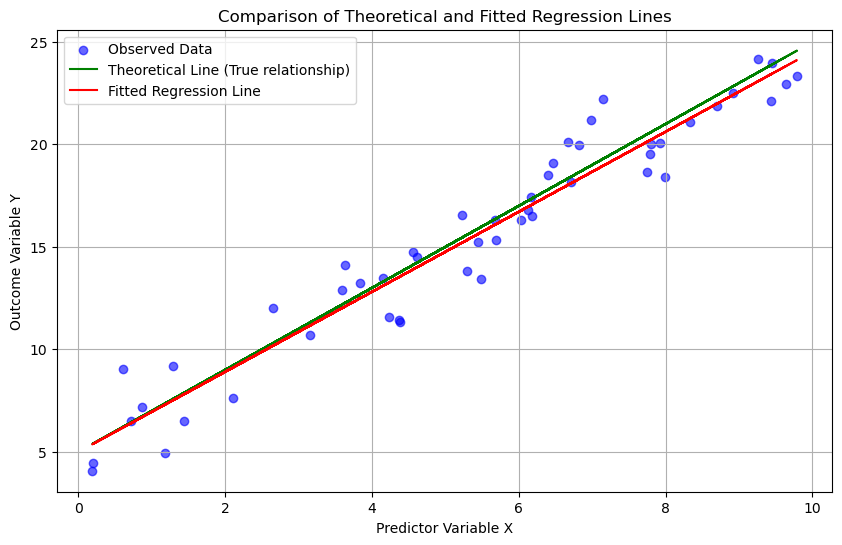

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters for the theoretical SLR model
beta_0 = 5    # True intercept
beta_1 = 2    # True slope
sigma = 1.5   # Standard deviation of the error term

# Generate predictor variable X and error term ε
np.random.seed(0)  # For reproducibility
X = np.random.uniform(0, 10, 50)  # 50 random values between 0 and 10
epsilon = np.random.normal(0, sigma, X.shape)

# Calculate the outcome variable Y based on the theoretical SLR equation
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame to hold our simulated data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Display the model summary
print(model.summary())

# Visualize the observed data points, fitted regression line, and the true line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label='Observed Data', color='blue', alpha=0.6)

# Plot the theoretical line
plt.plot(data['X'], beta_0 + beta_1 * data['X'], label='Theoretical Line (True relationship)', color='green')

# Plot the fitted regression line from the model
plt.plot(data['X'], model.predict(data['X']), label='Fitted Regression Line', color='red')

# Labels and legend
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Comparison of Theoretical and Fitted Regression Lines")
plt.legend()
plt.grid(True)
plt.show()

Summary:
Simple Linear Regression Model: We explored the theoretical Simple Linear Regression (SLR) model, where we assume a linear relationship between a predictor variable 𝑋 and an outcome variable 𝑌. The model includes:

Intercept (𝛽0): The baseline value of 𝑌 when X=0. Slope (𝛽1): The rate of change in 𝑌 for each one-unit increase in 
𝑋.
Error term (𝜖): Represents random variation in 𝑌 around the predicted values, which we assume is normally distributed with mean zero and constant variance.
Sample from a Normal Distribution: We discussed how in SLR, each observed 𝑌 for a given 𝑋 can be viewed as a random sample from a normal distribution centered around the mean predicted by the linear equation, 𝛽0+𝛽1𝑋. This captures the effect of the error term, leading to data that randomly deviates from the true line.

Python Simulation of the SLR Model: Using numpy, we simulated data based on the SLR model. We generated predictor values 𝑋 and a normally distributed error term 𝜖, then calculated 𝑌=𝛽0+𝛽1𝑋+𝜖 This produced a dataset with random sampling variation around the true line.

Fitting a Linear Regression Model Using statsmodels: We fit a Simple Linear Regression model to the simulated data using the statsmodels library in Python. We used the ols function from statsmodels.formula.api, with Y ~ X indicating 𝑌 as the dependent variable and 𝑋 as the independent variable.

Visualization of Theoretical vs. Fitted Line: We plotted both the observed data points and the fitted regression line, showing the model's approximation of the underlying relationship. Then, we added the theoretical line (without error) to the plot to illustrate the impact of random sampling variation. The theoretical line shows the true relationship, while the fitted line represents an estimated relationship based on observed data, which includes randomness due to sampling error.

question 4:

the value in fitted_model.fitted shows the predict Y value through in SLR model. fitted_model.params or fitted_model.summary().tables[1] show the estimated values for the B0 (intercept) and (B1) the slope.

Derivation of fitted_model.fittedvalues from fitted_model.params
1. Fitted Model Equation: Y = B0 + B1X, where B0 is the intercept, the predict Y value when x value equal to 0. B1 is the slope, the change in Y when one unit of X changes
2. Accessing the Parameters: fitted_model.params stores the predicted (estimated) coefficient from the SLR model. 
    B0 (intercept) is represented by fitted_model.params[0] 
    B1 (slope) is represented by fitted_model.params[1]
3. Calculation of Fitted Values: 
    calculate the fitted value in fitted_model.fittedvalues by bring the x value in the fitted model equation Y = B0 + B1Xi, where Xi is the each individual value of X.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     705.7
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           2.34e-30
Time:                        05:45:14   Log-Likelihood:                -87.319
No. Observations:                  50   AIC:                             178.6
Df Residuals:                      48   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9892      0.443     11.250      0.0

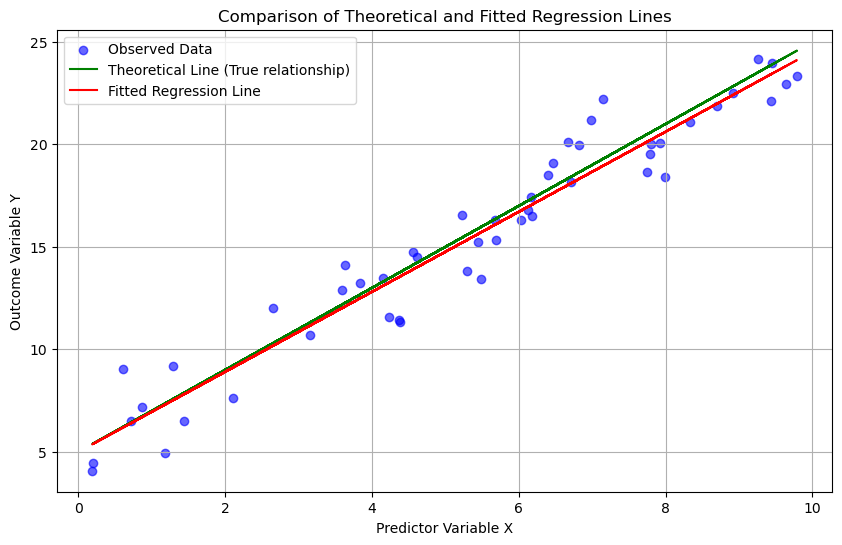

Fitted values from the model:
 0    15.712506
1    18.963341
2    16.766638
3    15.635712
4    13.267018
dtype: float64
Manually calculated fitted values:
 0    15.712506
1    18.963341
2    16.766638
3    15.635712
4    13.267018
Name: X, dtype: float64


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Parameters for the theoretical SLR model
beta_0 = 5    # True intercept
beta_1 = 2    # True slope
sigma = 1.5   # Standard deviation of the error term

# Generate predictor variable X and error term ε
np.random.seed(0)  # For reproducibility
X = np.random.uniform(0, 10, 50)  # 50 random values between 0 and 10
epsilon = np.random.normal(0, sigma, X.shape)

# Calculate the outcome variable Y based on the theoretical SLR equation
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame to hold our simulated data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()

# Display the model summary
print(model.summary())

# Visualize the observed data points, fitted regression line, and the true line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label='Observed Data', color='blue', alpha=0.6)

# Plot the theoretical line
plt.plot(data['X'], beta_0 + beta_1 * data['X'], label='Theoretical Line (True relationship)', color='green')

# Plot the fitted regression line from the model
plt.plot(data['X'], model.predict(data['X']), label='Fitted Regression Line', color='red')

# Labels and legend
plt.xlabel("Predictor Variable X")
plt.ylabel("Outcome Variable Y")
plt.title("Comparison of Theoretical and Fitted Regression Lines")
plt.legend()
plt.grid(True)
plt.show()

# Extract the intercept (beta_0) and slope (beta_1) from the fitted model
beta_0 = model.params['Intercept']
beta_1 = model.params['X']

# Manually calculate the fitted values
fitted_values_manual = beta_0 + beta_1 * data['X']

# Compare with the fitted values from the model
print("Fitted values from the model:\n", model.fittedvalues.head())
print("Manually calculated fitted values:\n", fitted_values_manual.head())


summary: 
The fitted_model.fittedvalues represents the predicted values for each observation in a regression model. These values are derived by applying the model's estimated parameters (fitted_model.params) to each observation's explanatory variables.

Model Parameters (fitted_model.params): These are the coefficients for each explanatory variable, estimated to minimize the residual sum of squares. They include the intercept, if present.

Calculating Fitted Values: For each observation, the fitted value is calculated by multiplying each explanatory variable by its corresponding coefficient and summing these products. Mathematically, this is:

𝑦^𝑖=𝛽0+𝛽1𝑥𝑖1+𝛽2𝑥𝑖2+⋯+𝛽𝑘𝑥𝑖𝑘 where 𝛽0,𝛽1,…,𝛽𝑘 are the coefficients, and 𝑥𝑖1,𝑥𝑖2,…,𝑥𝑖𝑘 are the variable values for observation 𝑖.

Summary Table (fitted_model.summary().tables[1]): This table provides a detailed summary of each parameter, showing the coefficients used to compute the fitted values. Although it doesn't directly show fitted values, it confirms the parameters used to derive them.

question 9

1. Filter the Data: For each short_time_limit values, we set a specific limit and only include the observation values that is less than the specific limit.
2. Fit a Linear Regression Model: For each short wait times in data, use SLR to calculate the relationship between eruption duration and wait time
3. Test the Null Hypothesis: For each model, evaluate the importance of the slope (B1) by using the p-value. If the p-value is less than 0.05, reject a null hypothesis and conclude the result: there is a linear relationship between eruption duration and wait time for the each short wait times in values.

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import warnings

# Suppress the omni_normtest warning for subsets with fewer than 8 observations
warnings.filterwarnings("ignore", message=".*omni_normtest.*")

# Example dataset (replace with your actual data)
geyser_data = pd.DataFrame({
    'wait_time': [60, 65, 58, 70, 62, 68, 64, 59, 66, 61],  # Replace with actual wait times
    'duration': [3.6, 4.2, 3.3, 5.1, 4.0, 4.5, 4.3, 3.7, 5.0, 3.8]  # Replace with actual eruption durations
})

# Define short wait limits
short_wait_limits = [62, 64, 66]

# Loop through each short wait limit
for short_wait_limit in short_wait_limits:
    # Filter the dataset for short wait times (less than the limit)
    short_wait_data = geyser_data[geyser_data['wait_time'] < short_wait_limit]
    
    # Check if there are enough observations to perform the regression
    if len(short_wait_data) < 2:
        print(f"Not enough data (less than 2 observations) for short wait times under {short_wait_limit} minutes. Skipping.")
        continue
    
    # Fit a linear regression model
    model = smf.ols('duration ~ wait_time', data=short_wait_data).fit()
    
    # Output the summary for each model
    print(f"\nAnalysis for short wait times under {short_wait_limit} minutes:")
    print(model.summary())
    
    # Interpret the p-value of the slope coefficient (wait_time)
    p_value = model.pvalues['wait_time']
    if p_value < 0.05:
        print(f"There is evidence against the null hypothesis (p-value = {p_value:.3f}), suggesting a relationship between wait time and duration.")
    else:
        print(f"No strong evidence against the null hypothesis (p-value = {p_value:.3f}), suggesting no relationship between wait time and duration.")


Analysis for short wait times under 62 minutes:
                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     4.667
Date:                Thu, 07 Nov 2024   Prob (F-statistic):              0.163
Time:                        15:55:46   Log-Likelihood:                 3.4370
No. Observations:                   4   AIC:                            -2.874
Df Residuals:                       2   BIC:                            -4.101
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

summary:

We explored how to test for a relationship between the duration and wait time of geyser eruptions specifically within "short" wait times—defined as wait times less than 62, 64, or 66 minutes. The goal was to assess if, within these shorter intervals, there is evidence of a relationship similar to that observed in the full dataset where longer delays typically led to longer eruption durations.

To analyze this, we outlined a Python code approach that:

Filters the Data: Limits the dataset to each specified short wait time threshold (62, 64, and 66 minutes).
Conducts Statistical Testing: Uses Pearson correlation to calculate the correlation coefficient and p-value between wait time and duration for each subset, helping to identify any statistically significant relationships.
Visualizes the Data: Creates scatter plots for each short wait limit with regression lines, annotating each plot with the correlation coefficient and p-value to visually and statistically evaluate the trends.


question 11:

Differences between Models:
1. Categorical vs. Continuous vs. Treatment of Wait Time:
   In continuous model (duration ~ waiting): the variable wait time(waiting) is a continus variables. For the linear relation between waiting (X) and duration (Y): Y = B0 + B1X. When waiting (X) increases by one unit, there is a proportion change in duration (Y).
    There is 2 cases for wait time: "short" (≤ 68 minutes) and "long" (> 68 minutes). There's no linear relation between waiting (X) and duration (Y). It estimates separate mean durations for the 2 cases, we can know whether there's a difference on average duration between short wait time and long wait time.
2. Flexibility and Interpretation:
    Continuous Model: By using a continuous predictor, it helps to capture every small change on waiting (X) if there's a change in duration (Y)
    Indicator Model: The indicator model captures a threshold effect by splitting wait time into long and short wait time, help us to understand whether there's a difference on average duration between short wait time and long wait time.
3. Model Purpose and Interpretation:
    The continuous model help us to understand on overall trend, and shows the duration value (Y) based on any waiting (X) value.
    The indictor model compares the 2 cases, short waiting time and long wait time, help us to understand the difference between short wait time and long wait time.

Evidence Against the Null Hypothesis:
Null Hypothesis (H₀): There is no difference in average duration between “short” and “long” wait times.
Alternative Hypothesis (H₁): There is no difference in average duration between “short” and “long” wait times.
Evidences: association with p-values
If the p-value for C(wait_time_category)[T.long] is less than 0.05: We have significant evidence to reject the null hypothesis. This will result: There is no difference in average duration between “short” and “long” wait times.
Evidences: association with p-values.
If the p-value is greater than 0.05: We do not have evidence to reject the null hypothesis. The will result: There is no difference in average duration between “short” and “long” wait times.

Example Result Interpretation:
Suppose the output shows:
Coefficient for C(wait_time_category)[T.long]: 2.5
p-value for C(wait_time_category)[T.long]: 0.01
The meaning of result:
Coefficient for C(wait_time_category)[T.long]: 2.5 : long wait times is 2.5 minutes longer than short wait times.
p-value for C(wait_time_category)[T.long]: 0.01 : The p-value for C(wait_time_category)[T.long] is less than 0.05: We have significant evidence to reject the null hypothesis. This will result: There is no difference in average duration between “short” and “long” wait times.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

# Load the Old Faithful dataset directly from seaborn
try:
    old_faithful = sns.load_dataset('geyser')
    print("Dataset loaded successfully.")
except:
    print("Error loading dataset. Make sure seaborn is installed and the dataset is accessible.")

# Verify column names
print("Column names in dataset:", old_faithful.columns)

# Check if 'waiting' column exists and create the indicator variable
if 'waiting' in old_faithful.columns:
    # Create the indicator variable for wait time length
    old_faithful['wait_time_category'] = old_faithful['waiting'].apply(lambda x: 'long' if x > 68 else 'short')
else:
    print("Column 'waiting' not found in the dataset.")
    old_faithful = None  # Prevent further processing

# Proceed only if the dataset is correctly loaded and modified
if old_faithful is not None:
    # Fit the model using the indicator variable
    model = smf.ols('duration ~ C(wait_time_category)', data=old_faithful).fit()

    # Print the summary of the model
    print(model.summary())

    # Print all keys in model.pvalues to understand the available labels
    print("Available p-value keys:", model.pvalues.keys())

    # Safely access p-value with the exact key
    for key in model.pvalues.keys():
        if "C(wait_time_category)[T.long]" in key:
            p_value = model.pvalues[key]
            if p_value < 0.05:
                print(f"Evidence against the null hypothesis of no difference (p-value = {p_value:.3f}) suggests a difference in duration between short and long wait times.")
            else:
                print(f"No strong evidence against the null hypothesis (p-value = {p_value:.3f}), suggesting no difference in duration between short and long wait times.")
            break
    else:
        print("P-value for 'C(wait_time_category)[T.long]' could not be found in the model results.")
else:
    print("The dataset or required column was not available for analysis.")

Dataset loaded successfully.
Column names in dataset: Index(['duration', 'waiting', 'kind'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1777.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.76e-121
Time:                        20:14:39   Log-Likelihood:                -145.90
No. Observations:                 272   AIC:                             295.8
Df Residuals:                     270   BIC:                             303.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--

summary:
Model Specification:

We specified a simple linear regression model with an indicator variable, where the eruption duration (duration) was predicted by the categorical variable wait_time_category.
This model contrasts with previous models that directly used the continuous wait time (waiting) variable.
Using an indicator variable simplifies the analysis by categorizing wait times, allowing us to focus specifically on whether there’s an average difference between two distinct groups ("short" and "long").
Hypothesis Testing:

Null Hypothesis (H₀): There is no difference in average eruption duration between short and long wait times.
Alternative Hypothesis (H₁): There is a significant difference in average eruption duration between short and long wait times.
Evidence Against the Null Hypothesis:

After fitting the model, we examined the coefficient for C(wait_time_category)[T.long], which represents the average difference in eruption duration between the "long" and "short" wait time groups.
The p-value for this coefficient tests the null hypothesis.
If the p-value is less than 0.05, we conclude there is a statistically significant difference in average eruption durations between the two groups.
If the p-value is greater than 0.05, we conclude that any difference observed could be due to chance.
Example Interpretation:

Suppose our output showed a positive coefficient for C(wait_time_category)[T.long] and a p-value of 0.01. This would indicate that "long" waits are associated with significantly longer eruptions than "short" waits, providing evidence against the null hypothesis.
By adopting this indicator-based model, we could simplify the interpretation and directly assess the impact of categorizing wait times into "short" and "long" on eruption duration.